Aula 1
No script do colab:
1. Importar as bibliotecas necessárias para trabalhar com o texto (NLTK, Pandas? etc)
2. Ler um dos arquivos txt ( o português primeiro)
3. Eliminar os comentários dentro do arquivo entre <  >
4. Tokenizar em palavras e contar número de palavras
5. Obter a lista de palavras mais frequentes
6. Obter os bigramas e trigramas mais *frequentes*

In [1]:
pip install nltk==3.6.2

     |████████████████████████████████| 1.5 MB 4.7 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from google.colab import drive # ler arquivos no google drive
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

In [4]:
remove_pt = string.punctuation
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
stop_words_pt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


# Abre o arquivo



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
with open('/content/drive/MyDrive/HarryPotter/Harry Potter e a camara secreta.txt', encoding='utf8', mode = "r") as f:
    filecontent = f.read()

In [8]:
print(filecontent[0:1000])

<título> O PIOR ANIVERSÁRIO. 

Não era a primeira vez que irrompia uma discussão à mesa do café da manhã na rua dos Alfeneiros número 4. O Sr Válter Dursley fora acordado nas primeiras horas da manhã por um pio alto que vinha do quarto do seu sobrinho Harry. 

 -- É a terceira vez esta semana!  -- berrou ele à mesa.  -- Se você não consegue controlar essa coruja, teremos que mandá-la embora! 

Harry tentou explicar, mais uma vez. 

 -- Ela está chateada. Está acostumada a voar ao ar livre. Se eu ao menos pudesse soltá-la à noite... 

 -- Eu tenho cara de idiota?  -- rosnou tio Válter, um pedaço de ovo pendurado na bigodeira.  -- Eu sei o que vai acontecer se você soltar essa coruja. 

Ele trocou olhares assustados com sua mulher Petúnia. 

Harry tentou argumentar, mas suas palavras foram abafadas por um alto e prolongado arroto dado pelo filho de Dursley, Duda. 

 -- Quero mais bacon. 

 -- Tem mais na frigideira, fofinho  -- disse tia Petúnia voltando os olhos úmidos para o filho maci

# Qual o tipo de arquivo?

In [9]:
type(filecontent)

str

# Qual o tamanho do arquivo texto?

In [10]:
len(filecontent)

535252

# Removendo comentários marcados em <> e </>

In [11]:
import re 
teste1 = "<aviso> A CÂMARA DOS SEGREDOS FOI ABERTA. INIMIGOS DO HERDEIRO, CUIDADO. </aviso>"
re.sub("\s?<.*?>\s?", "", teste1)

'A CÂMARA DOS SEGREDOS FOI ABERTA. INIMIGOS DO HERDEIRO, CUIDADO.'

In [12]:
teste2 = "<música> Teus olhos são verdes como sapinhos cozidos, Teus cabelos, negros como um quadro de aula. Queria que tu fosses meu, garoto divino, Herói que venceu o malvado Lord das Trevas. </música>"
re.sub("\s?<.*?>\s?", "", teste2)

'Teus olhos são verdes como sapinhos cozidos, Teus cabelos, negros como um quadro de aula. Queria que tu fosses meu, garoto divino, Herói que venceu o malvado Lord das Trevas.'

In [13]:
texto = re.sub("\s?<.*?>\s?", "", filecontent)
print(texto[0:1000])

O PIOR ANIVERSÁRIO. 

Não era a primeira vez que irrompia uma discussão à mesa do café da manhã na rua dos Alfeneiros número 4. O Sr Válter Dursley fora acordado nas primeiras horas da manhã por um pio alto que vinha do quarto do seu sobrinho Harry. 

 -- É a terceira vez esta semana!  -- berrou ele à mesa.  -- Se você não consegue controlar essa coruja, teremos que mandá-la embora! 

Harry tentou explicar, mais uma vez. 

 -- Ela está chateada. Está acostumada a voar ao ar livre. Se eu ao menos pudesse soltá-la à noite... 

 -- Eu tenho cara de idiota?  -- rosnou tio Válter, um pedaço de ovo pendurado na bigodeira.  -- Eu sei o que vai acontecer se você soltar essa coruja. 

Ele trocou olhares assustados com sua mulher Petúnia. 

Harry tentou argumentar, mas suas palavras foram abafadas por um alto e prolongado arroto dado pelo filho de Dursley, Duda. 

 -- Quero mais bacon. 

 -- Tem mais na frigideira, fofinho  -- disse tia Petúnia voltando os olhos úmidos para o filho maciço  -- Pr

# Tranformando o texto em sentenças pelo sent_tokenize

In [14]:
sentencas = []
for sentence in sent_tokenize(texto, language = 'portuguese'):
    sentencas.append(sentence)

In [15]:
index = 0
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + sentenca)
    index+=1

Sentença número 0: O PIOR ANIVERSÁRIO.
Sentença número 1: Não era a primeira vez que irrompia uma discussão à mesa do café da manhã na rua dos Alfeneiros número 4.
Sentença número 2: O Sr Válter Dursley fora acordado nas primeiras horas da manhã por um pio alto que vinha do quarto do seu sobrinho Harry.
Sentença número 3: -- É a terceira vez esta semana!
Sentença número 4: -- berrou ele à mesa.
Sentença número 5: -- Se você não consegue controlar essa coruja, teremos que mandá-la embora!
Sentença número 6: Harry tentou explicar, mais uma vez.
Sentença número 7: -- Ela está chateada.
Sentença número 8: Está acostumada a voar ao ar livre.
Sentença número 9: Se eu ao menos pudesse soltá-la à noite... 

 -- Eu tenho cara de idiota?
Sentença número 10: -- rosnou tio Válter, um pedaço de ovo pendurado na bigodeira.
Sentença número 11: -- Eu sei o que vai acontecer se você soltar essa coruja.
Sentença número 12: Ele trocou olhares assustados com sua mulher Petúnia.
Sentença número 13: Harry t

# Poderia ser feita a segmentação por quebra de linha e depois pelo sent_tokenize

In [16]:
sentencas_linha = []
for sentence in texto.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

In [17]:
index = 0
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + sentenca)
    index+=1

Sentença número 0: O PIOR ANIVERSÁRIO.
Sentença número 1: Não era a primeira vez que irrompia uma discussão à mesa do café da manhã na rua dos Alfeneiros número 4.
Sentença número 2: O Sr Válter Dursley fora acordado nas primeiras horas da manhã por um pio alto que vinha do quarto do seu sobrinho Harry.
Sentença número 3:  -- É a terceira vez esta semana!
Sentença número 4: -- berrou ele à mesa.
Sentença número 5: -- Se você não consegue controlar essa coruja, teremos que mandá-la embora!
Sentença número 6: Harry tentou explicar, mais uma vez.
Sentença número 7:  -- Ela está chateada.
Sentença número 8: Está acostumada a voar ao ar livre.
Sentença número 9: Se eu ao menos pudesse soltá-la à noite...
Sentença número 10:  -- Eu tenho cara de idiota?
Sentença número 11: -- rosnou tio Válter, um pedaço de ovo pendurado na bigodeira.
Sentença número 12: -- Eu sei o que vai acontecer se você soltar essa coruja.
Sentença número 13: Ele trocou olhares assustados com sua mulher Petúnia.
Sentenç

# Tokenização

In [18]:
sentencas_tokenizadas = [] 

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)

In [19]:
index = 0
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(tokens))
    index+=1

Sentença número 0: ['O', 'PIOR', 'ANIVERSÁRIO', '.']
Sentença número 1: ['Não', 'era', 'a', 'primeira', 'vez', 'que', 'irrompia', 'uma', 'discussão', 'à', 'mesa', 'do', 'café', 'da', 'manhã', 'na', 'rua', 'dos', 'Alfeneiros', 'número', '4', '.']
Sentença número 2: ['O', 'Sr', 'Válter', 'Dursley', 'fora', 'acordado', 'nas', 'primeiras', 'horas', 'da', 'manhã', 'por', 'um', 'pio', 'alto', 'que', 'vinha', 'do', 'quarto', 'do', 'seu', 'sobrinho', 'Harry', '.']
Sentença número 3: ['--', 'É', 'a', 'terceira', 'vez', 'esta', 'semana', '!']
Sentença número 4: ['--', 'berrou', 'ele', 'à', 'mesa', '.']
Sentença número 5: ['--', 'Se', 'você', 'não', 'consegue', 'controlar', 'essa', 'coruja', ',', 'teremos', 'que', 'mandá-la', 'embora', '!']
Sentença número 6: ['Harry', 'tentou', 'explicar', ',', 'mais', 'uma', 'vez', '.']
Sentença número 7: ['--', 'Ela', 'está', 'chateada', '.']
Sentença número 8: ['Está', 'acostumada', 'a', 'voar', 'ao', 'ar', 'livre', '.']
Sentença número 9: ['Se', 'eu', 'ao', 

# Pre-processamento dos elementos tokenizados

In [20]:
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt) for s in raw]   
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)
 


In [21]:
index = 0
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(texto))
    index+=1



Sentença número 0: pior aniversário
Sentença número 1: primeira vez irrompia discussão mesa café manhã rua alfeneiros número
Sentença número 2: sr válter dursley acordado primeiras horas manhã pio alto vinha quarto sobrinho harry
Sentença número 3: terceira vez semana
Sentença número 4: berrou mesa
Sentença número 5: consegue controlar coruja mandála embora
Sentença número 6: harry tentou explicar vez
Sentença número 7: chateada
Sentença número 8: acostumada voar ar livre
Sentença número 9: menos pudesse soltála noite
Sentença número 10: cara idiota
Sentença número 11: rosnou tio válter pedaço ovo pendurado bigodeira
Sentença número 12: sei vai acontecer soltar coruja
Sentença número 13: trocou olhares assustados mulher petúnia
Sentença número 14: harry tentou argumentar palavras abafadas alto prolongado arroto dado filho dursley duda
Sentença número 15: quero bacon
Sentença número 16: frigideira fofinho disse tia petúnia voltando olhos úmidos filho maciço precisamos alimentálo bem enq

# Unigramas

In [22]:
ngram_value = 1
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [23]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: [('pior',), ('aniversário',)]
Sentença número 1: [('primeira',), ('vez',), ('irrompia',), ('discussão',), ('mesa',), ('café',), ('manhã',), ('rua',), ('alfeneiros',), ('número',)]
Sentença número 2: [('sr',), ('válter',), ('dursley',), ('acordado',), ('primeiras',), ('horas',), ('manhã',), ('pio',), ('alto',), ('vinha',), ('quarto',), ('sobrinho',), ('harry',)]
Sentença número 3: [('terceira',), ('vez',), ('semana',)]
Sentença número 4: [('berrou',), ('mesa',)]
Sentença número 5: [('consegue',), ('controlar',), ('coruja',), ('mandála',), ('embora',)]
Sentença número 6: [('harry',), ('tentou',), ('explicar',), ('vez',)]
Sentença número 7: [('chateada',)]
Sentença número 8: [('acostumada',), ('voar',), ('ar',), ('livre',)]
Sentença número 9: [('menos',), ('pudesse',), ('soltála',), ('noite',)]
Sentença número 10: [('cara',), ('idiota',)]
Sentença número 11: [('rosnou',), ('tio',), ('válter',), ('pedaço',), ('ovo',), ('pendurado',), ('bigodeira',)]
Sentença número 12: [

In [24]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('pior',)
Ngram número 1: ('aniversário',)
Ngram número 2: ('primeira',)
Ngram número 3: ('vez',)
Ngram número 4: ('irrompia',)
Ngram número 5: ('discussão',)
Ngram número 6: ('mesa',)
Ngram número 7: ('café',)
Ngram número 8: ('manhã',)
Ngram número 9: ('rua',)
Ngram número 10: ('alfeneiros',)
Ngram número 11: ('número',)
Ngram número 12: ('sr',)
Ngram número 13: ('válter',)
Ngram número 14: ('dursley',)
Ngram número 15: ('acordado',)
Ngram número 16: ('primeiras',)
Ngram número 17: ('horas',)
Ngram número 18: ('manhã',)
Ngram número 19: ('pio',)
Ngram número 20: ('alto',)
Ngram número 21: ('vinha',)
Ngram número 22: ('quarto',)
Ngram número 23: ('sobrinho',)
Ngram número 24: ('harry',)
Ngram número 25: ('terceira',)
Ngram número 26: ('vez',)
Ngram número 27: ('semana',)
Ngram número 28: ('berrou',)
Ngram número 29: ('mesa',)
Ngram número 30: ('consegue',)
Ngram número 31: ('controlar',)
Ngram número 32: ('coruja',)
Ngram número 33: ('mandála',)
Ngram número 34: ('embo

In [25]:
ngram_list

Counter({('pior',): 20,
         ('aniversário',): 16,
         ('primeira',): 30,
         ('vez',): 157,
         ('irrompia',): 1,
         ('discussão',): 2,
         ('mesa',): 55,
         ('café',): 14,
         ('manhã',): 29,
         ('rua',): 19,
         ('alfeneiros',): 7,
         ('número',): 11,
         ('sr',): 133,
         ('válter',): 38,
         ('dursley',): 40,
         ('acordado',): 9,
         ('primeiras',): 3,
         ('horas',): 25,
         ('pio',): 3,
         ('alto',): 73,
         ('vinha',): 17,
         ('quarto',): 35,
         ('sobrinho',): 3,
         ('harry',): 1588,
         ('terceira',): 3,
         ('semana',): 8,
         ('berrou',): 24,
         ('consegue',): 6,
         ('controlar',): 5,
         ('coruja',): 19,
         ('mandála',): 2,
         ('embora',): 48,
         ('tentou',): 33,
         ('explicar',): 11,
         ('chateada',): 3,
         ('acostumada',): 1,
         ('voar',): 17,
         ('ar',): 53,
         ('li

In [26]:
common

[(('harry',), 1588),
 (('disse',), 781),
 (('rony',), 685),
 (('lockhart',), 227),
 (('coisa',), 202),
 (('weasley',), 192),
 (('bem',), 188),
 (('olhos',), 185),
 (('cabeça',), 185),
 (('perguntou',), 171),
 (('hagrid',), 160),
 (('vez',), 157),
 (('hermione',), 155),
 (('mione',), 154),
 (('voz',), 151),
 (('ser',), 149),
 (('dobby',), 147),
 (('dumbledore',), 147),
 (('então',), 143),
 (('ter',), 142),
 (('porta',), 142),
 (('sr',), 133),
 (('dois',), 132),
 (('vai',), 131),
 (('agora',), 130),
 (('malfoy',), 130),
 (('riddle',), 130),
 (('fazer',), 129),
 (('potter',), 128),
 (('ainda',), 125),
 (('draco',), 125),
 (('parecia',), 122),
 (('vamos',), 119),
 (('senhor',), 118),
 (('varinha',), 115),
 (('sobre',), 115),
 (('gina',), 115),
 (('aqui',), 114),
 (('sala',), 113),
 (('quase',), 113),
 (('dizer',), 112),
 (('ver',), 111),
 (('nunca',), 108),
 (('lado',), 106),
 (('escola',), 104),
 (('nada',), 103),
 (('ah',), 102),
 (('fred',), 102),
 (('rosto',), 101),
 (('carro',), 101),

In [27]:
df_common.head(30)

,Ngram,Count
0,"(harry,)",1588
1,"(disse,)",781
2,"(rony,)",685
3,"(lockhart,)",227
4,"(coisa,)",202
5,"(weasley,)",192
6,"(bem,)",188
7,"(olhos,)",185
8,"(cabeça,)",185
9,"(perguntou,)",171


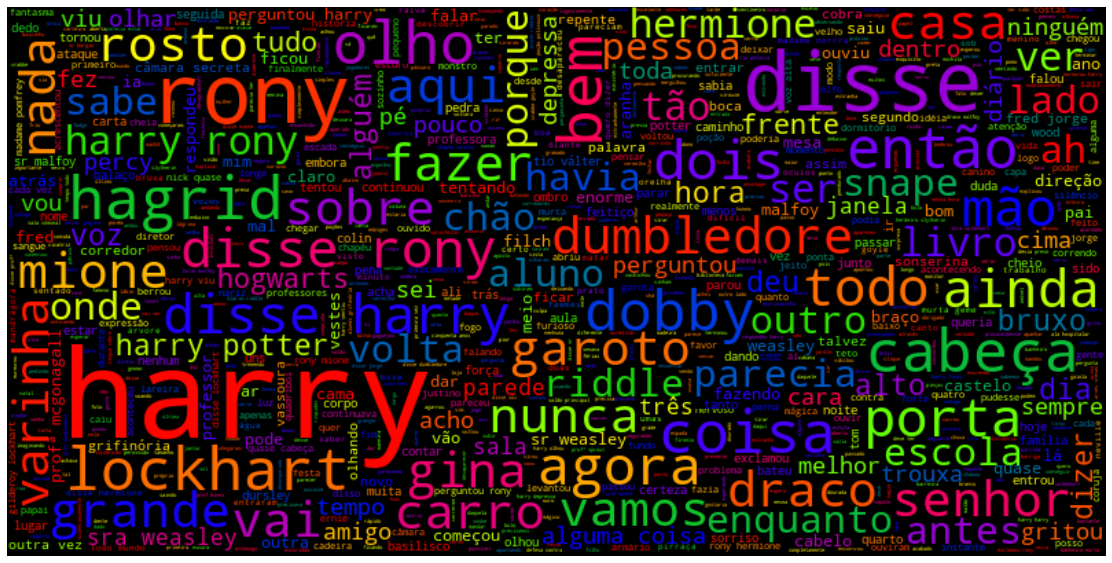

In [28]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'prism'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

# Bigramas

In [29]:
ngram_value = 2
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [30]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: [('pior', 'aniversário')]
Sentença número 1: [('primeira', 'vez'), ('vez', 'irrompia'), ('irrompia', 'discussão'), ('discussão', 'mesa'), ('mesa', 'café'), ('café', 'manhã'), ('manhã', 'rua'), ('rua', 'alfeneiros'), ('alfeneiros', 'número')]
Sentença número 2: [('sr', 'válter'), ('válter', 'dursley'), ('dursley', 'acordado'), ('acordado', 'primeiras'), ('primeiras', 'horas'), ('horas', 'manhã'), ('manhã', 'pio'), ('pio', 'alto'), ('alto', 'vinha'), ('vinha', 'quarto'), ('quarto', 'sobrinho'), ('sobrinho', 'harry')]
Sentença número 3: [('terceira', 'vez'), ('vez', 'semana')]
Sentença número 4: [('berrou', 'mesa')]
Sentença número 5: [('consegue', 'controlar'), ('controlar', 'coruja'), ('coruja', 'mandála'), ('mandála', 'embora')]
Sentença número 6: [('harry', 'tentou'), ('tentou', 'explicar'), ('explicar', 'vez')]
Sentença número 7: []
Sentença número 8: [('acostumada', 'voar'), ('voar', 'ar'), ('ar', 'livre')]
Sentença número 9: [('menos', 'pudesse'), ('pudesse', 'so

In [31]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('pior', 'aniversário')
Ngram número 1: ('primeira', 'vez')
Ngram número 2: ('vez', 'irrompia')
Ngram número 3: ('irrompia', 'discussão')
Ngram número 4: ('discussão', 'mesa')
Ngram número 5: ('mesa', 'café')
Ngram número 6: ('café', 'manhã')
Ngram número 7: ('manhã', 'rua')
Ngram número 8: ('rua', 'alfeneiros')
Ngram número 9: ('alfeneiros', 'número')
Ngram número 10: ('sr', 'válter')
Ngram número 11: ('válter', 'dursley')
Ngram número 12: ('dursley', 'acordado')
Ngram número 13: ('acordado', 'primeiras')
Ngram número 14: ('primeiras', 'horas')
Ngram número 15: ('horas', 'manhã')
Ngram número 16: ('manhã', 'pio')
Ngram número 17: ('pio', 'alto')
Ngram número 18: ('alto', 'vinha')
Ngram número 19: ('vinha', 'quarto')
Ngram número 20: ('quarto', 'sobrinho')
Ngram número 21: ('sobrinho', 'harry')
Ngram número 22: ('terceira', 'vez')
Ngram número 23: ('vez', 'semana')
Ngram número 24: ('berrou', 'mesa')
Ngram número 25: ('consegue', 'controlar')
Ngram número 26: ('controla

In [32]:
ngram_list

Counter({('pior', 'aniversário'): 1,
         ('primeira', 'vez'): 11,
         ('vez', 'irrompia'): 1,
         ('irrompia', 'discussão'): 1,
         ('discussão', 'mesa'): 1,
         ('mesa', 'café'): 2,
         ('café', 'manhã'): 11,
         ('manhã', 'rua'): 1,
         ('rua', 'alfeneiros'): 7,
         ('alfeneiros', 'número'): 1,
         ('sr', 'válter'): 1,
         ('válter', 'dursley'): 1,
         ('dursley', 'acordado'): 1,
         ('acordado', 'primeiras'): 1,
         ('primeiras', 'horas'): 1,
         ('horas', 'manhã'): 1,
         ('manhã', 'pio'): 1,
         ('pio', 'alto'): 1,
         ('alto', 'vinha'): 1,
         ('vinha', 'quarto'): 1,
         ('quarto', 'sobrinho'): 1,
         ('sobrinho', 'harry'): 1,
         ('terceira', 'vez'): 1,
         ('vez', 'semana'): 1,
         ('berrou', 'mesa'): 1,
         ('consegue', 'controlar'): 1,
         ('controlar', 'coruja'): 1,
         ('coruja', 'mandála'): 1,
         ('mandála', 'embora'): 1,
         ('h

In [33]:
common

[(('disse', 'rony'), 126),
 (('disse', 'harry'), 121),
 (('harry', 'rony'), 94),
 (('harry', 'potter'), 80),
 (('alguma', 'coisa'), 71),
 (('sra', 'weasley'), 60),
 (('perguntou', 'harry'), 59),
 (('profª', 'mcgonagall'), 54),
 (('sr', 'weasley'), 53),
 (('fred', 'jorge'), 47),
 (('câmara', 'secreta'), 46),
 (('outra', 'vez'), 45),
 (('sr', 'malfoy'), 43),
 (('tio', 'válter'), 36),
 (('perguntou', 'rony'), 32),
 (('disse', 'lockhart'), 31),
 (('gilderoy', 'lockhart'), 30),
 (('rony', 'hermione'), 30),
 (('nick', 'quase'), 30),
 (('quase', 'cabeça'), 30),
 (('rony', 'mione'), 29),
 (('harry', 'viu'), 29),
 (('madame', 'pomfrey'), 29),
 (('harry', 'disse'), 28),
 (('voz', 'alta'), 25),
 (('cada', 'vez'), 24),
 (('disse', 'hermione'), 24),
 (('madame', 'norrra'), 24),
 (('murta', 'geme'), 24),
 (('quero', 'dizer'), 23),
 (('todo', 'mundo'), 23),
 (('lúcio', 'malfoy'), 22),
 (('exclamou', 'rony'), 22),
 (('disse', 'voz'), 22),
 (('disse', 'dumbledore'), 22),
 (('herdeiro', 'slytherin'), 22

In [34]:
df_common.head(30)

,Ngram,Count
0,"(disse, rony)",126
1,"(disse, harry)",121
2,"(harry, rony)",94
3,"(harry, potter)",80
4,"(alguma, coisa)",71
5,"(sra, weasley)",60
6,"(perguntou, harry)",59
7,"(profª, mcgonagall)",54
8,"(sr, weasley)",53
9,"(fred, jorge)",47


# Trigramas

In [35]:
ngram_value = 3
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [36]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: []
Sentença número 1: [('primeira', 'vez', 'irrompia'), ('vez', 'irrompia', 'discussão'), ('irrompia', 'discussão', 'mesa'), ('discussão', 'mesa', 'café'), ('mesa', 'café', 'manhã'), ('café', 'manhã', 'rua'), ('manhã', 'rua', 'alfeneiros'), ('rua', 'alfeneiros', 'número')]
Sentença número 2: [('sr', 'válter', 'dursley'), ('válter', 'dursley', 'acordado'), ('dursley', 'acordado', 'primeiras'), ('acordado', 'primeiras', 'horas'), ('primeiras', 'horas', 'manhã'), ('horas', 'manhã', 'pio'), ('manhã', 'pio', 'alto'), ('pio', 'alto', 'vinha'), ('alto', 'vinha', 'quarto'), ('vinha', 'quarto', 'sobrinho'), ('quarto', 'sobrinho', 'harry')]
Sentença número 3: [('terceira', 'vez', 'semana')]
Sentença número 4: []
Sentença número 5: [('consegue', 'controlar', 'coruja'), ('controlar', 'coruja', 'mandála'), ('coruja', 'mandála', 'embora')]
Sentença número 6: [('harry', 'tentou', 'explicar'), ('tentou', 'explicar', 'vez')]
Sentença número 7: []
Sentença número 8: [('acostumada', 'v

In [37]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('primeira', 'vez', 'irrompia')
Ngram número 1: ('vez', 'irrompia', 'discussão')
Ngram número 2: ('irrompia', 'discussão', 'mesa')
Ngram número 3: ('discussão', 'mesa', 'café')
Ngram número 4: ('mesa', 'café', 'manhã')
Ngram número 5: ('café', 'manhã', 'rua')
Ngram número 6: ('manhã', 'rua', 'alfeneiros')
Ngram número 7: ('rua', 'alfeneiros', 'número')
Ngram número 8: ('sr', 'válter', 'dursley')
Ngram número 9: ('válter', 'dursley', 'acordado')
Ngram número 10: ('dursley', 'acordado', 'primeiras')
Ngram número 11: ('acordado', 'primeiras', 'horas')
Ngram número 12: ('primeiras', 'horas', 'manhã')
Ngram número 13: ('horas', 'manhã', 'pio')
Ngram número 14: ('manhã', 'pio', 'alto')
Ngram número 15: ('pio', 'alto', 'vinha')
Ngram número 16: ('alto', 'vinha', 'quarto')
Ngram número 17: ('vinha', 'quarto', 'sobrinho')
Ngram número 18: ('quarto', 'sobrinho', 'harry')
Ngram número 19: ('terceira', 'vez', 'semana')
Ngram número 20: ('consegue', 'controlar', 'coruja')
Ngram núme

In [38]:
ngram_list

Counter({('primeira', 'vez', 'irrompia'): 1,
         ('vez', 'irrompia', 'discussão'): 1,
         ('irrompia', 'discussão', 'mesa'): 1,
         ('discussão', 'mesa', 'café'): 1,
         ('mesa', 'café', 'manhã'): 2,
         ('café', 'manhã', 'rua'): 1,
         ('manhã', 'rua', 'alfeneiros'): 1,
         ('rua', 'alfeneiros', 'número'): 1,
         ('sr', 'válter', 'dursley'): 1,
         ('válter', 'dursley', 'acordado'): 1,
         ('dursley', 'acordado', 'primeiras'): 1,
         ('acordado', 'primeiras', 'horas'): 1,
         ('primeiras', 'horas', 'manhã'): 1,
         ('horas', 'manhã', 'pio'): 1,
         ('manhã', 'pio', 'alto'): 1,
         ('pio', 'alto', 'vinha'): 1,
         ('alto', 'vinha', 'quarto'): 1,
         ('vinha', 'quarto', 'sobrinho'): 1,
         ('quarto', 'sobrinho', 'harry'): 1,
         ('terceira', 'vez', 'semana'): 1,
         ('consegue', 'controlar', 'coruja'): 1,
         ('controlar', 'coruja', 'mandála'): 1,
         ('coruja', 'mandála', 'embo

In [39]:
common

[(('nick', 'quase', 'cabeça'), 30),
 (('harry', 'rony', 'hermione'), 15),
 (('disse', 'sra', 'weasley'), 13),
 (('disse', 'sr', 'malfoy'), 12),
 (('banheiro', 'murta', 'geme'), 12),
 (('defesa', 'contra', 'artes'), 10),
 (('contra', 'artes', 'trevas'), 10),
 (('harry', 'potter', 'deve'), 9),
 (('harry', 'disse', 'lockhart'), 8),
 (('disse', 'harry', 'depressa'), 7),
 (('coisa', 'disse', 'rony'), 7),
 (('disse', 'profª', 'mcgonagall'), 7),
 (('sala', 'comunal', 'grifinória'), 7),
 (('alguma', 'coisa', 'sobre'), 7),
 (('sobre', 'câmara', 'secreta'), 7),
 (('disse', 'tio', 'válter'), 6),
 (('harry', 'ergueu', 'olhos'), 6),
 (('famoso', 'harry', 'potter'), 6),
 (('harry', 'nunca', 'vira'), 6),
 (('harry', 'deu', 'salto'), 6),
 (('disse', 'voz', 'alta'), 6),
 (('harry', 'rony', 'mione'), 6),
 (('disse', 'harry', 'rony'), 6),
 (('escola', 'magia', 'bruxaria'), 5),
 (('magia', 'bruxaria', 'hogwarts'), 5),
 (('rony', 'fred', 'jorge'), 5),
 (('sr', 'sra', 'weasley'), 5),
 (('professor', 'defesa

In [40]:
df_common.head(30)

,Ngram,Count
0,"(nick, quase, cabeça)",30
1,"(harry, rony, hermione)",15
2,"(disse, sra, weasley)",13
3,"(disse, sr, malfoy)",12
4,"(banheiro, murta, geme)",12
5,"(defesa, contra, artes)",10
6,"(contra, artes, trevas)",10
7,"(harry, potter, deve)",9
8,"(harry, disse, lockhart)",8
9,"(disse, harry, depressa)",7
